In [3]:
import sys
print(sys.version)

3.9.12 (main, Jun  1 2022, 11:38:51) 
[GCC 7.5.0]


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import os

from PIL import Image

In [5]:
#Wczytanie etykiet do treninegu 

with open('../Magisterka/identity_CelebA (2).txt',"r") as csvfile:
    lines = csvfile.readlines()
csvfile.close()

new = []

for i in lines:
    i = i.replace("\n","")
    new.append(i.split(" "))
 
    
value_train = []

for i in range(len(lines)):
    value_train.append(int(new[i][1])) 
    
    


In [6]:
print(max(value_train))

10177


In [7]:
chrom = np.zeros((max(value_train)+1), dtype=np.uint16)


for i in value_train:
    chrom[i] = chrom[i] + 1


In [61]:
print(chrom)

index = np.where(chrom == max(chrom))

print(index)

[ 0 29  8 ... 30 30 13]
(array([    3,    12,    39,    58,    98,   110,   148,   156,   158,
         167,   170,   258,   279,   288,   357,   364,   385,   391,
         410,   420,   482,   528,   548,   549,   583,   584,   646,
         654,   689,   693,   724,   739,   750,   759,   774,   780,
         797,   804,   825,   831,   839,   881,   895,   896,   931,
         939,   945,   952,   960,  1002,  1022,  1046,  1068,  1081,
        1171,  1212,  1240,  1263,  1313,  1390,  1425,  1452,  1485,
        1520,  1534,  1562,  1630,  1645,  1650,  1667,  1674,  1676,
        1684,  1699,  1781,  1794,  1841,  1894,  1920,  1940,  1942,
        1978,  2010,  2013,  2033,  2037,  2099,  2116,  2129,  2146,
        2152,  2163,  2176,  2177,  2179,  2200,  2208,  2226,  2278,
        2306,  2336,  2339,  2355,  2362,  2379,  2400,  2418,  2424,
        2432,  2457,  2495,  2505,  2526,  2535,  2577,  2619,  2625,
        2642,  2652,  2681,  2703,  2729,  2736,  2745,  2748,  2

In [9]:
np.array(value_train)

array([ 2880,  2937,  8692, ...,  9852,  5570, 10101])

In [48]:
person = []


val = 3782

bb = value_train.index(val)
person = np.where(value_train == val)



In [49]:
print(person)
print(bb)

(array([], dtype=int64),)
162910


In [50]:
print(value_train[1])

2937


In [51]:
indeksy = [i for i, element in enumerate(value_train) if element == val]



for i in range(len(indeksy)):
    
    indeksy[i] = indeksy[i] + 1

In [52]:
print(indeksy)
print(len(indeksy))

[162911, 162999, 163029, 165037, 168682, 168897, 169007, 169376, 170404, 170479, 173006, 173054, 173077, 173218, 173996, 174009, 175532, 175541, 175760, 176864, 177091, 178019, 178103, 178528, 178574, 178726, 179286, 180343, 180478, 180481, 180853, 180890, 181300, 182155, 182371]
35


In [53]:
folder = '../Magisterka/img_align_celeba/img_align_celeba/'
docelowy = '../Magisterka/img_align_celeba/wybranePostacie'
jpg = '.jpg'

In [54]:
twarz = Image.open('../Magisterka/img_align_celeba/img_align_celeba/'+'{:06d}'.format(indeksy[0])+'.jpg').convert('L')

(178, 218)


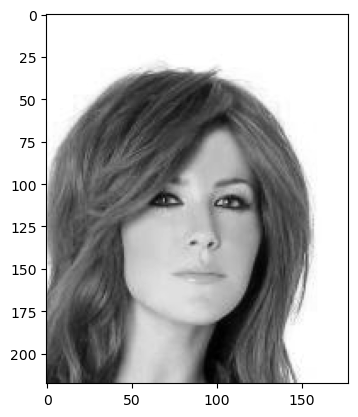

In [55]:
print(twarz.size)
plt.imshow(twarz, cmap = 'gray')

In [17]:
arr_twarz = np.array(twarz)

In [18]:
print(arr_twarz)

[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [118 119 122 ...  90  92  92]
 [108 109 112 ...  93  94  94]
 [106 107 110 ...  93  94  94]]


In [19]:
w, h = 92, 92
data = np.zeros((h, w), dtype=np.uint8)
data[0:w, 0:w] = [255] 

In [20]:
for x in range(w):
    for y in range(h):
        data[y][x] = arr_twarz[y+80][x+40]

In [21]:
con = Image.fromarray(data)

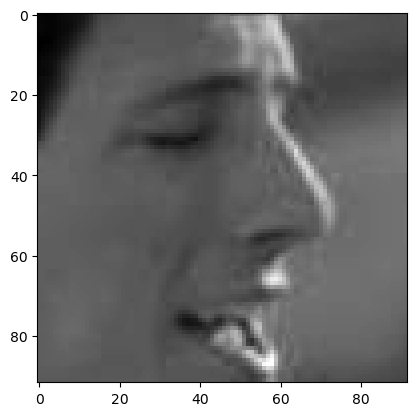

In [22]:
plt.imshow(con, cmap = 'gray')

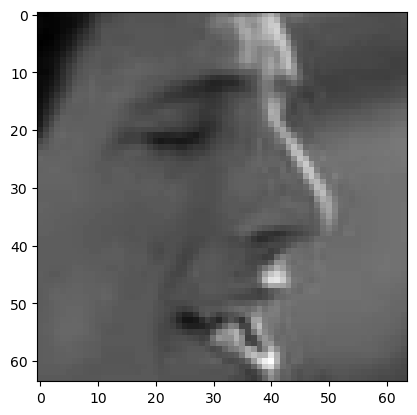

In [23]:
con_2 = con.resize((int(64), int(64)))
plt.imshow(con_2, cmap = 'gray')

In [56]:
#Wlasciwa czesc kodu
w, h = 92, 92

for i in range(len(indeksy)):
    im = Image.open(folder+'{:06d}'.format(indeksy[i])+jpg).convert('L') 
    im_arr = np.array(im)
    
    #Tworzenie pustej tablicy
    data = np.zeros((h, w), dtype=np.uint8)
    data[0:w, 0:w] = [255]    
    
    
    #Kopiowanie 92 wierszy (kwadratowy obraz)
    for x in range(w):
        for y in range(h):
            data[y][x] = im_arr[y+80][x+40]
    
    
    #konwersja tablicy znaków na obraz
    con = Image.fromarray(data)
    
    
    #Zmiana rozmiaru zdjec
    con_2 = con.resize((int(64), int(64)))
    
    
    
    con_2.save(docelowy+'/4/'+str(i)+'.jpg')